<a href="https://colab.research.google.com/github/iimog/master-bioinf-lecture/blob/main/WS_2023/3_ml_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Cats vs Dogs

## Data Loading

In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [4]:
files = get_image_files(path/"images")

In [5]:
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_57.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_131.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_111.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_25.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_48.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_210.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_177.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_71.jpg')...]

In [6]:
import skimage as ski
import matplotlib.pyplot as plt

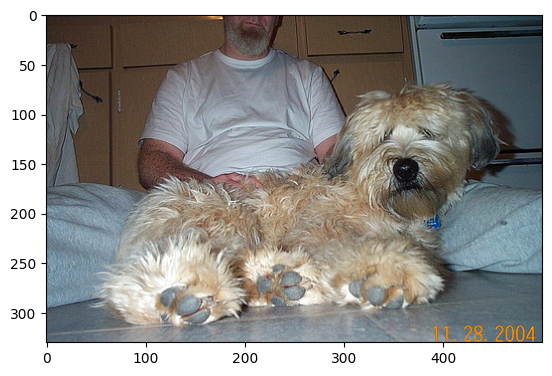

In [14]:
img = ski.io.imread(files[1])
plt.imshow(img)

In [10]:
def cat_or_dog(filename):
  if filename[0].isupper():
    return "cat"
  else:
    return "dog"

In [11]:
cat_or_dog("Bombay_25.jpg")

'cat'

In [12]:
cat_or_dog("havanese_57.jpg")

'dog'

In [13]:
dls = ImageDataLoaders.from_name_func(path, files, cat_or_dog, item_tfms=Resize(224))

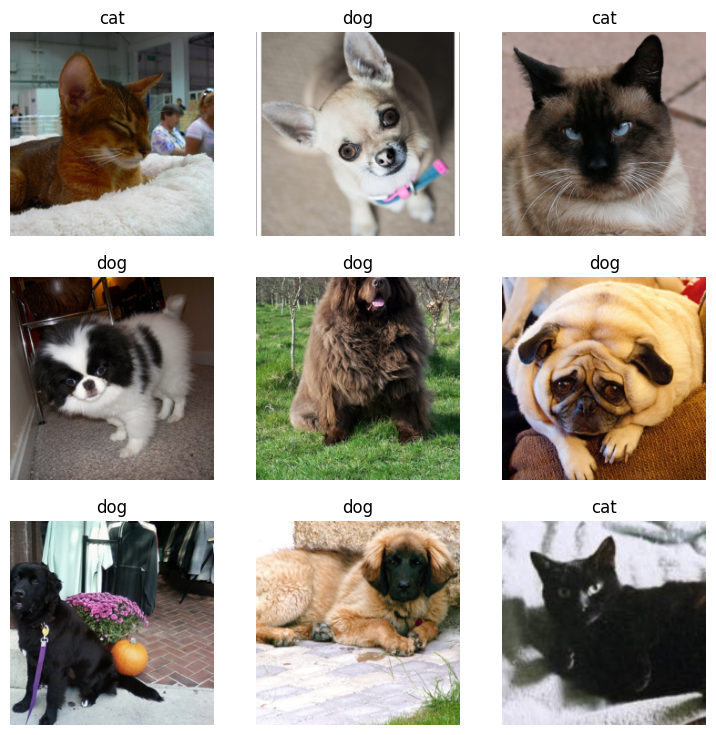

In [16]:
dls.show_batch()

In [17]:
dls[0].n

5912

In [18]:
dls[1].n

1478

## Prepare training

In [19]:
learner = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 132MB/s]


### Performance before training

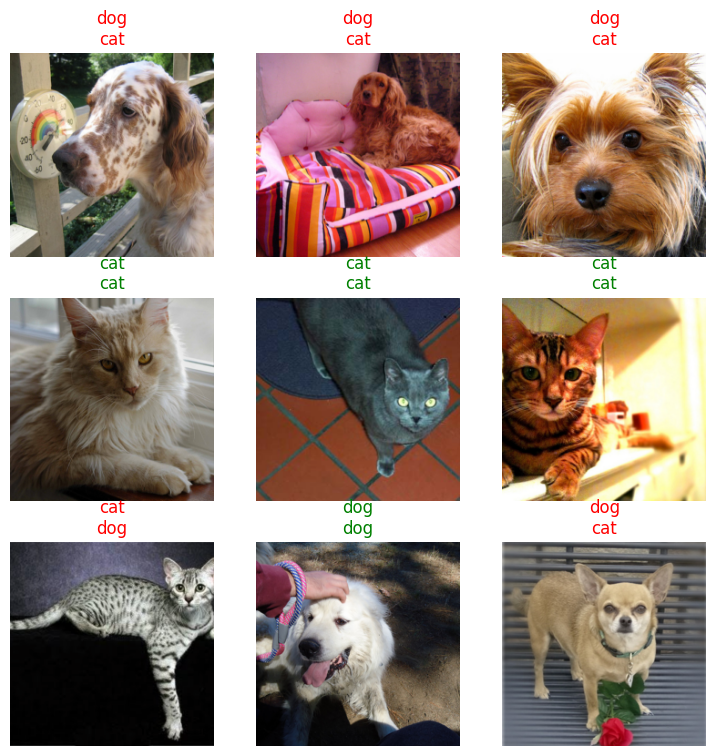

In [20]:
learner.show_results()

In [21]:
learner.validate()

(#2) [3.6176133155822754,0.33829498291015625]

In [22]:
learner.fine_tune(1)

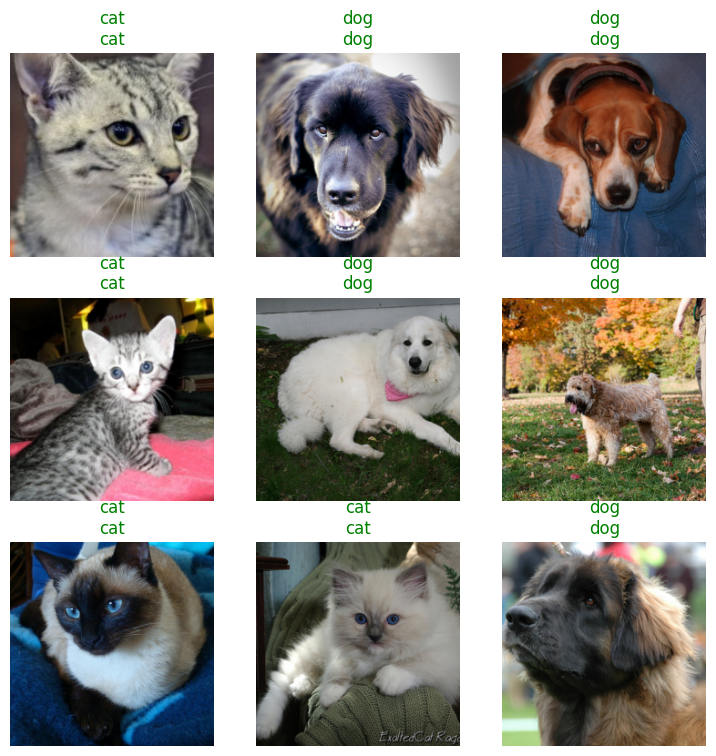

In [24]:
learner.show_results()

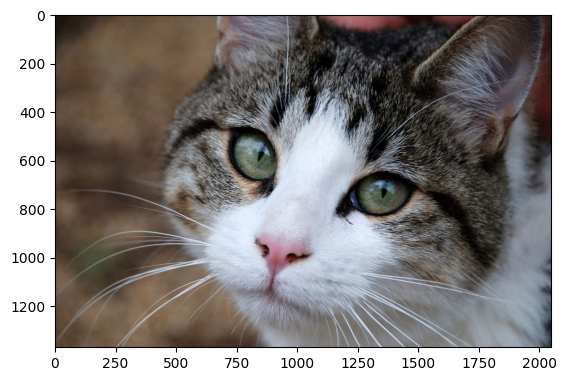

In [25]:
cat = ski.io.imread("http://t3.gstatic.com/licensed-image?q=tbn:ANd9GcS-tY6FtmFux57YnjVe1zHPcZk1DrXkwBFAXg3iBVI3dvHkm6mGDzoI9uK39dcPKwEiYzh-arcx4qzgRlaR170")
plt.imshow(cat)

In [26]:
learner.predict(cat)

('cat', tensor(0), tensor([1.0000e+00, 5.8872e-16]))

('dog', tensor(1), tensor([0.0152, 0.9848]))

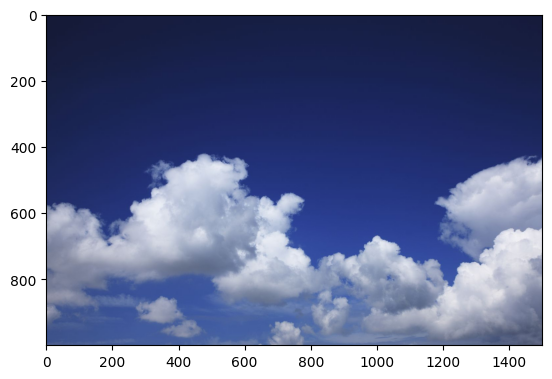

In [31]:
cloud = ski.io.imread("https://www.treehugger.com/thmb/w2dViRblhQ1rYMMyYcx-n8idY0A=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/clouds-128082585-e371ed6111184c6fa8cfa77313bc18e3.jpg")
plt.imshow(cloud)
learner.predict(cloud)

In [27]:
interpret = ClassificationInterpretation.from_learner(learner)

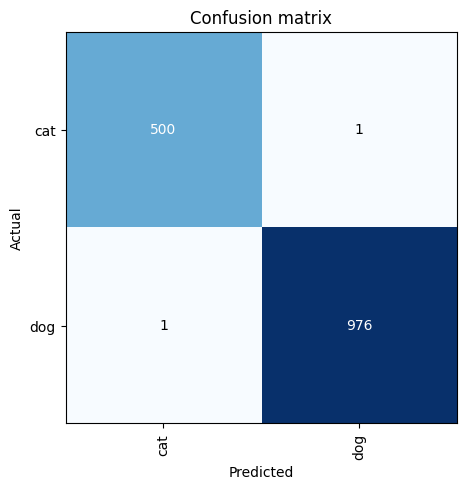

In [28]:
interpret.plot_confusion_matrix()

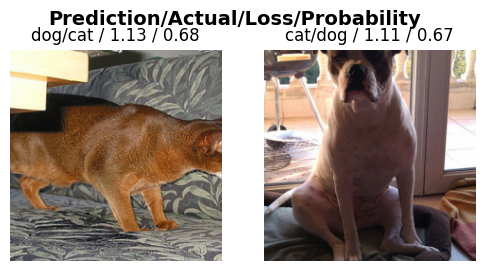

In [29]:
interpret.plot_top_losses(2)